In [1]:
# Load the sample image
import PIL
import torch
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

def view_image(transform):
    image_path = "ecografia.jpeg"
    image = PIL.Image.open(image_path)
    image = transform(image)

    # Display the image
    plt.axis('off')
    plt.imshow(image.permute(1, 2, 0))


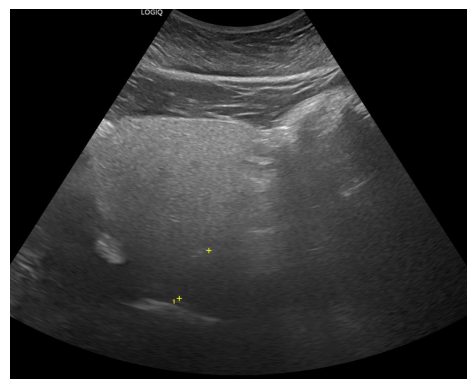

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

view_image(transform)

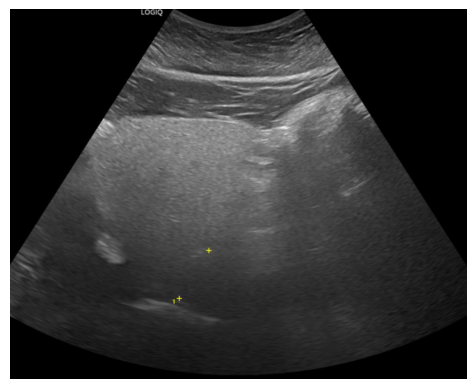

In [3]:
# Apply a low-frequency filter to the image to remove noise
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.GaussianBlur(15, sigma=(0.1, 2))
])

view_image(transform)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1330..1568].


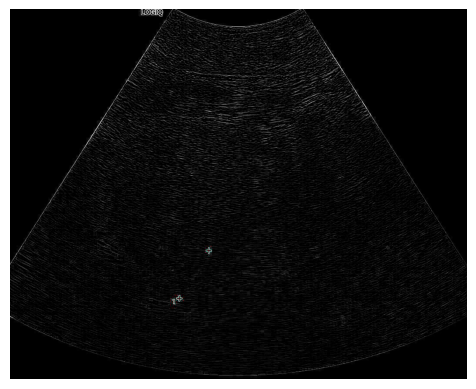

In [4]:
import cv2

image_path = "ecografia.jpeg"
image = cv2.imread(image_path)

# Apply a high-frequency filter to the image to enhance the edges
filtered_image = cv2.Laplacian(image, cv2.CV_16S, ksize=3)

transform = transforms.Compose([
    transforms.ToTensor(),
])

filtered_image = transform(filtered_image)
# Display the image
plt.axis('off')
plt.imshow(filtered_image.permute(1, 2, 0))

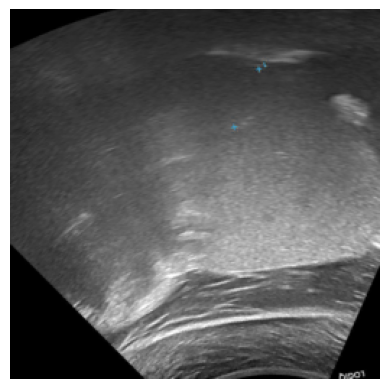

In [5]:
# Apply a set of transformations to the image to use data augmentation

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomVerticalFlip(p=1),
    transforms.RandomRotation(degrees=45),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    transforms.RandomResizedCrop(size=(256, 256), scale=(0.5, 1.0), ratio=(0.5, 1.5)),
    transforms.ToTensor(),
])

view_image(transform)